# AIRPLANE CRASHES AND FATALITY REGRESSION PROJECT MODEL

# IMPORT 

In [1]:
## Imported variables required for the regression models 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#  Extensive EDA 

In [2]:
#File exported and read to see the data and analysis was carried out to see if there is anything needed to be done to clean data 

In [3]:
## Import the file and read it 
df = pd.read_csv (r'C:\Users\PavanithPushpanandar\Downloads\Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [4]:
df

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [5]:
df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [6]:
##From the data there is A LOT OF nulls which means that this has to be taken care off 

df.isnull().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3562 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


In [8]:
df.describe()

,index,Aboard,Fatalities,Ground
count,5268.00000,5246.000000,5256.000000,5246.000000
mean,2633.50000,27.554518,20.068303,1.608845
std,1520.88494,43.076711,33.199952,53.987827
min,0.00000,0.000000,0.000000,0.000000
25%,1316.75000,5.000000,3.000000,0.000000
50%,2633.50000,13.000000,9.000000,0.000000
75%,3950.25000,30.000000,23.000000,0.000000
max,5267.00000,644.000000,583.000000,2750.000000


In [9]:
## Started off by deleting columns with over 300 null values as this could have an effect on the mean with null values significantly               

In [10]:
df=df.drop(columns=['Summary', 'Flight #','Registration','Time','cn/In'])


In [11]:
df=df.drop(columns=['index'])

In [12]:
df=df.drop(columns=['Route'])

In [13]:
df['year'] = pd.DatetimeIndex(df['Date']).year

In [14]:
df=df.drop(columns=['Date'])

In [15]:
## Since Fatalities is the target variable it was very important to try and keep fatalities so decided to replace nulls with the mean values as there was only 12 out of around more than 5000 values for the column
df['Fatalities'].fillna((df['Fatalities'].mean()), inplace=True)

In [16]:
### Decided to see which of these has nulls to evaluate what could be done 
df.isnull().sum()

Location      20
Operator      18
Type          27
Aboard        22
Fatalities     0
Ground        22
year           0
dtype: int64

In [17]:
### Here i decided to see what to do with the rest of the nulls so i decided to have a mean for the numerical values and for the text values i added a mode as its a text so can't take average so chose mode instead        

In [18]:
df['Ground'].fillna((df['Ground'].mean()), inplace=True)

In [19]:
df['Aboard'].fillna((df['Aboard'].mean()), inplace=True)

In [20]:
df.fillna(df['Type'].mode()[0], inplace = True)

In [21]:
df.fillna(df['Operator'].mode()[0], inplace = True)

In [22]:
df.fillna(df['Location'].mode()[0], inplace = True)

In [23]:
## Decided to encode the Location values and I only wanted capital city/Country of location so decided to split and remove the cities along with countries.

In [24]:
labels = df.columns.values            

In [25]:
x = df[labels[0]].values
z = []
for j in x:
    try:
        z.append(j.split(",")[1])
    except:
        z.append(j)
df["Location"] = z
df

,Location,Operator,Type,Aboard,Fatalities,Ground,year
0,Virginia,Military - U.S. Army,Wright Flyer III,2.0,1.0,0.000000,1908
1,New Jersey,Military - U.S. Navy,Dirigible,5.0,5.0,0.000000,1912
2,British Columbia,Private,Curtiss seaplane,1.0,1.0,0.000000,1913
3,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.000000,1913
4,Germany,Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.000000,1913
...,...,...,...,...,...,...,...
5263,Indonesia,Military - Indonesian Air Force,Lockheed C-130 Hercules,112.0,98.0,2.000000,2009
5264,DemocratiRepubliCongo,Service Air,Antonov An-26,4.0,4.0,1.608845,2009
5265,570 miles northeast of Natal,Air France,Airbus A330-203,228.0,228.0,0.000000,2009
5266,Newfoundland,Strait Air,Britten-Norman BN-2A-27 Islander,1.0,1.0,0.000000,2009


In [26]:
print(df['Location'].value_counts())

 Brazil                            175
 Alaska                            173
 Russia                            166
 Colombia                          143
 California                        138
                                  ... 
 Morrocco                            1
Singapore                            1
Midway Island Naval Air Station      1
Persian Gulf                         1
 570 miles northeast of Natal        1
Name: Location, Length: 737, dtype: int64


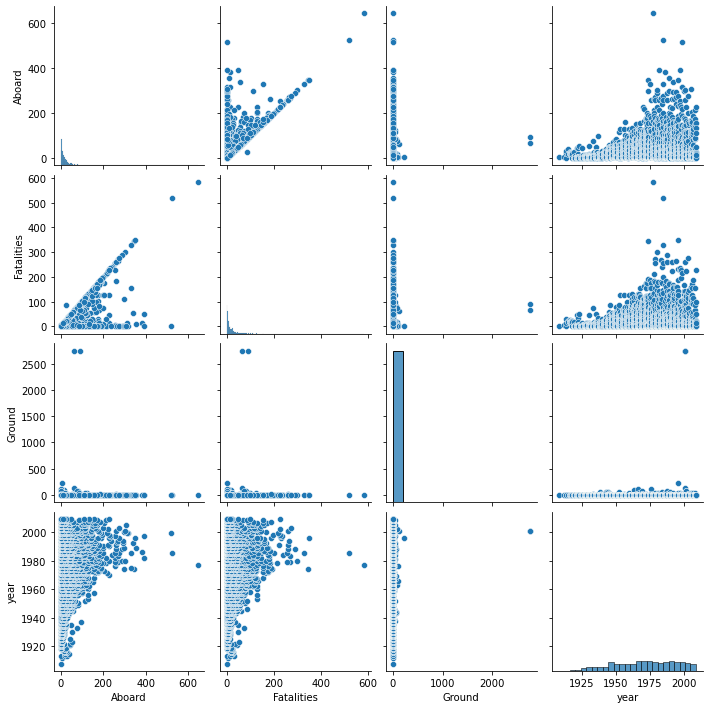

In [27]:
###pairplot to see a visual representation of the df data 
sns.pairplot(df)

In [28]:
## This is where i label encoded the location and had values and i used the df head to check if it was successfully implemented.
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df['Location Coded'] = label.fit_transform(df['Location'])


df.head()


,Location,Operator,Type,Aboard,Fatalities,Ground,year,Location Coded
0,Virginia,Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,1908,531
1,New Jersey,Military - U.S. Navy,Dirigible,5.0,5.0,0.0,1912,361
2,British Columbia,Private,Curtiss seaplane,1.0,1.0,0.0,1913,103
3,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,1913,701
4,Germany,Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,1913,199


In [29]:
## This code was just to show which number is which from the label encoder

col_names = ['Location', 'Location Coded']

multiple_columns = df[col_names].values

list(multiple_columns)

[array([' Virginia', 531], dtype=object),
 array([' New Jersey', 361], dtype=object),
 array([' British Columbia', 103], dtype=object),
 array(['Over the North Sea', 701], dtype=object),
 array([' Germany', 199], dtype=object),
 array([' Belgium', 82], dtype=object),
 array([' Germany', 199], dtype=object),
 array([' Bulgeria', 110], dtype=object),
 array([' England', 177], dtype=object),
 array([' England', 177], dtype=object),
 array([' Germany', 199], dtype=object),
 array([' England', 177], dtype=object),
 array([' Belgium', 82], dtype=object),
 array(['Off Northern Germany', 676], dtype=object),
 array([' North Sea', 375], dtype=object),
 array([' North Sea', 375], dtype=object),
 array(['Off western Denmark', 692], dtype=object),
 array([' France', 186], dtype=object),
 array(['Over the Mediterranean', 697], dtype=object),
 array([' Germany', 199], dtype=object),
 array([' North Sea', 375], dtype=object),
 array([' New Jersey', 361], dtype=object),
 array([' Ohio', 384], dtype=ob

In [30]:
## Eventually decided to drop operator and type as I didn't want it for the data analysis as I wanted to base my model more off to where the number of fataities where rather than which operator and only included the year as I just wanted to know what year the crash happened and the month and day would be too specific within my data so i was more interested in what year crash happened 
## The year ranges from 1908 but i though the month and day wouldn't be relevant as I wanted to see if technology has improved based on year to avoid more airplane accidents 
df=df.drop(columns=['Operator','Type','Location'])

In [31]:
## Since location was in front of the table i decided that I wanted my Location coded to go in fron 

cols=list(df)
cols.insert(0, cols.pop(cols.index('Location Coded')))
cols

df = df.loc[:, cols]
df

,Location Coded,Aboard,Fatalities,Ground,year
0,531,2.0,1.0,0.000000,1908
1,361,5.0,5.0,0.000000,1912
2,103,1.0,1.0,0.000000,1913
3,701,20.0,14.0,0.000000,1913
4,199,30.0,30.0,0.000000,1913
...,...,...,...,...,...
5263,242,112.0,98.0,2.000000,2009
5264,161,4.0,4.0,1.608845,2009
5265,34,228.0,228.0,0.000000,2009
5266,367,1.0,1.0,0.000000,2009


# Normalisation

In [32]:
## I wanted features to be more on a similar scale so therefore i decided to normalize my model 
## Data for the x axis would vary heavily if i dind't normalize so decided to normalize to have a 0-1 .

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
#Convert to table format - MinMaxScaler
dfd = pd.DataFrame(data=scaled_features, columns=["Location Coded","Aboard","Fatalities","Ground","Year"])

In [33]:
#Normalized dataframe
dfd

,Location Coded,Aboard,Fatalities,Ground,Year
0,0.721467,0.003106,0.001715,0.000000,0.000000
1,0.490489,0.007764,0.008576,0.000000,0.039604
2,0.139946,0.001553,0.001715,0.000000,0.049505
3,0.952446,0.031056,0.024014,0.000000,0.049505
4,0.270380,0.046584,0.051458,0.000000,0.049505
...,...,...,...,...,...
5263,0.328804,0.173913,0.168096,0.000727,1.000000
5264,0.218750,0.006211,0.006861,0.000585,1.000000
5265,0.046196,0.354037,0.391081,0.000000,1.000000
5266,0.498641,0.001553,0.001715,0.000000,1.000000


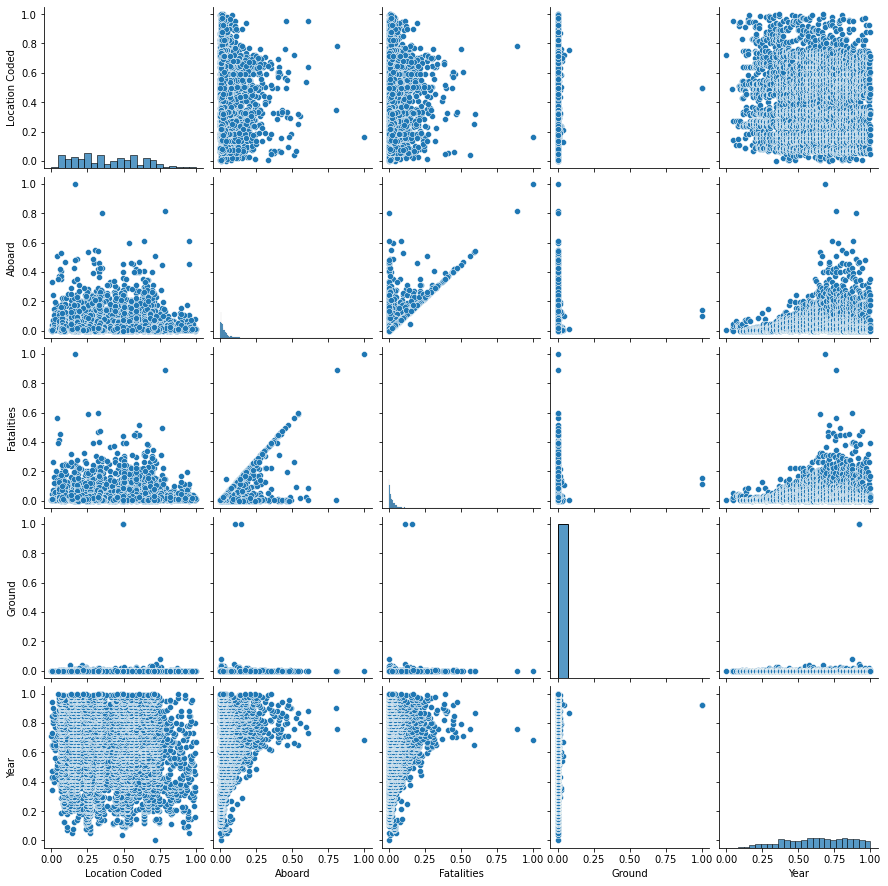

In [34]:
## Visualise the plots 
sns.pairplot(dfd)


In [35]:
#labelled my x and y to show which values i wanted my x and y to be 
X = dfd.drop(columns="Fatalities")
y_pred = dfd.Fatalities 

X,y_pred

(      Location Coded    Aboard    Ground      Year
 0           0.721467  0.003106  0.000000  0.000000
 1           0.490489  0.007764  0.000000  0.039604
 2           0.139946  0.001553  0.000000  0.049505
 3           0.952446  0.031056  0.000000  0.049505
 4           0.270380  0.046584  0.000000  0.049505
 ...              ...       ...       ...       ...
 5263        0.328804  0.173913  0.000727  1.000000
 5264        0.218750  0.006211  0.000585  1.000000
 5265        0.046196  0.354037  0.000000  1.000000
 5266        0.498641  0.001553  0.000000  1.000000
 5267        0.322011  0.020186  0.000000  1.000000
 
 [5268 rows x 4 columns],
 0       0.001715
 1       0.008576
 2       0.001715
 3       0.024014
 4       0.051458
           ...   
 5263    0.168096
 5264    0.006861
 5265    0.391081
 5266    0.001715
 5267    0.022298
 Name: Fatalities, Length: 5268, dtype: float64)

# Train model with train test and split

In [36]:
## Trained model  to split data into train and test sets
## Regression Models are now ready to be created 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_pred,test_size=0.3,random_state = 0)

# Multilinear regression Model

In [37]:
## import variables  and assigned linear rgression to fit the training variable 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train,y_train)

LinearRegression()

In [38]:
## added a predicted variable for the x variable 

y_pred = regressor.predict(X_test)
print(y_pred)

[0.021139   0.01040818 0.01488012 ... 0.07158095 0.15116662 0.00813234]


In [39]:
print(y_test)

444     0.003431
29      0.001715
575     0.015437
148     0.006861
3200    0.073756
          ...   
1495    0.013722
1850    0.173242
2012    0.099485
3924    0.157804
1951    0.005146
Name: Fatalities, Length: 1581, dtype: float64


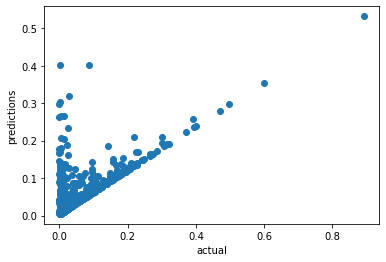

In [40]:
## Plotted the chart for a visual representation of the linear model

plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predictions")
plt.show()

In [41]:
## Imported the metrics to print out the metrics as listed below to see many metrics and the r2 value 

import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.017878504941678305
MSE: 0.0015416001067134956
RMSE: 0.039263215695017846
R-Squared: 0.5700650646885947


# Lasso Model

In [42]:
## Same principle as linear regression but from the imprts i ahve already imported lasso to provide a lasso model   
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0).fit(X_train,y_train)

In [43]:
## predicted values for lasso model 
pred = lasso_model.predict(X_test)


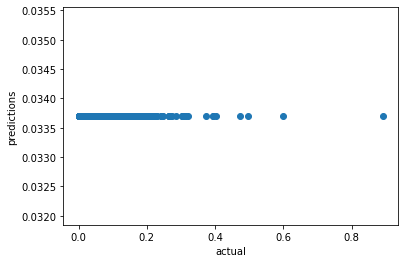

In [44]:
## Plotted the chart for a visual representation of the lasso model

plt.scatter(y_test,pred)
plt.xlabel("actual")
plt.ylabel("predictions")
plt.show()

In [45]:
## Imported the metrics to print out the metrics as listed below to see many metrics and the r2 value 
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.03358755575894125
MSE: 0.003591508022260046
RMSE: 0.05992919173708291
R-Squared: -0.0016312028627392117


In [46]:
## Same principle as linear regression but from the imprts i ahve already imported ridge to provide ridge model   
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0).fit(X_train,y_train)

In [47]:
## predicted values for ridge model 
pre = ridge_model.predict(X_test)


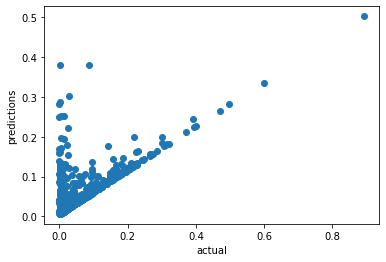

In [48]:
## Plotted the chart for a visual representation of the ridge model with actual values vs predicted values
plt.scatter(y_test,pre)
plt.xlabel("actual")
plt.ylabel("predictions")
plt.show()

In [49]:
## Imported the metrics to print out the metrics as listed below to see many metrics and the r2 value 
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, pre)
mse = metrics.mean_squared_error(y_test, pre)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(y_test,pre)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.018591112602182797
MSE: 0.001551283488752568
RMSE: 0.03938633632051308
R-Squared: 0.5673644783222382


# Conclusion

In [ ]:
## Based on the R square value and a lower value for the other metrics I think the multi linear regression would be the best model 
## On the other hand Ridge is also a good model but has a higher MAE, MSE and RMSE than multilinear regression 
## Lasso model doesn not work and it isn't a good model as there is no correlation and should be rather than a constant line form the visual graph